In [8]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
import numpy as np

import warnings
from typing import Self
from datetime import datetime
from functools import reduce
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from concurrent.futures import ThreadPoolExecutor, wait, FIRST_COMPLETED

import src.utils.anomalydetectors as m
import src.utils.globals as g
import src.utils.aggregators as agg

from src.utils.experiment import Experiment
from src.utils.noise import NoiseFactory
from src.utils.plotting import plot_rpcurves

In [3]:
def run_experiment_none(df : pd.DataFrame, models, columns, name):
    df['anomalous'] = df['anomaly'] != "none"
    df_anomalies = df.groupby('seqid').agg({'anomalous' : any})

    experiment = Experiment(name)
    experiment.run(df, models, columns, verbose=True)
    experiment.set_anomalies(df_anomalies)
    experiment.calculate_metrics(models=models, aggrfunc=agg.aggr_sum)

    experiment.pickle()

    return experiment   

In [4]:
df_in = pd.read_parquet(g.path_imu)
models = {"z" : m.ZScore(), "mz" : m.MZScore(), "lof" : m.LOF(), 'if' : m.IF()}
print(df_in['seqid'].unique(), len(df_in['seqid'].unique()))

['2024.09.23|00.00.16' '2024.09.23|00.01.47' '2024.09.23|00.03.19' ...
 '2024.09.26|18.19.05' '2024.09.26|18.20.35' '2024.09.26|18.22.05'] 1569


In [5]:
exps_sensors = {}
for (sensor, axes) in g.imu_sensor_real_axes:
    sensors = [f"{sensor}_{axis}" for axis in axes]

    print(f"Running Experiment {sensor}")
    exp = run_experiment_none(df_in, models, sensors, f"nonoise_{sensor}")

    print(f"Experiment {sensor} Done")
    exps_sensors[exp.name] = exp

Running Experiment acceleration
model_fit_scores z for 1 on ['acceleration_x', 'acceleration_y', 'acceleration_z']
model_fit_scores mz for 1 on ['acceleration_x', 'acceleration_y', 'acceleration_z']
model_fit_scores lof for 1 on ['acceleration_x', 'acceleration_y', 'acceleration_z']
model_fit_scores if for 1 on ['acceleration_x', 'acceleration_y', 'acceleration_z']
         timeindex_bin  acceleration_x  acceleration_y  acceleration_z
0                    0       -0.306641       -0.128906        0.185547
1                    1       -0.156250       -0.062500        0.092773
2                    2       -0.005859        0.003906        0.000000
3                    3       -0.003906       -0.007812        0.000000
4                    4       -0.003906       -0.012695        0.001953
...                ...             ...             ...             ...
4996379           3173       -0.050781        0.019531        0.082031
4996380           3174       -0.121094        0.033203        0.

0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.613481
1       0.615903
2       0.623836
3       0.611533
4       0.613091
          ...   
1564    0.574732
1565    0.571568
1566    0.567879
1567    0.565791
1568    0.569726
Name: z, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.413793
1       0.415427
2       0.420778
3       0.412479
4       0.413530
          ...   
1564    0.387657
1565    0.385523
1566    0.383034
1567    0.381626
1568    0.384280
Name: mz, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
N

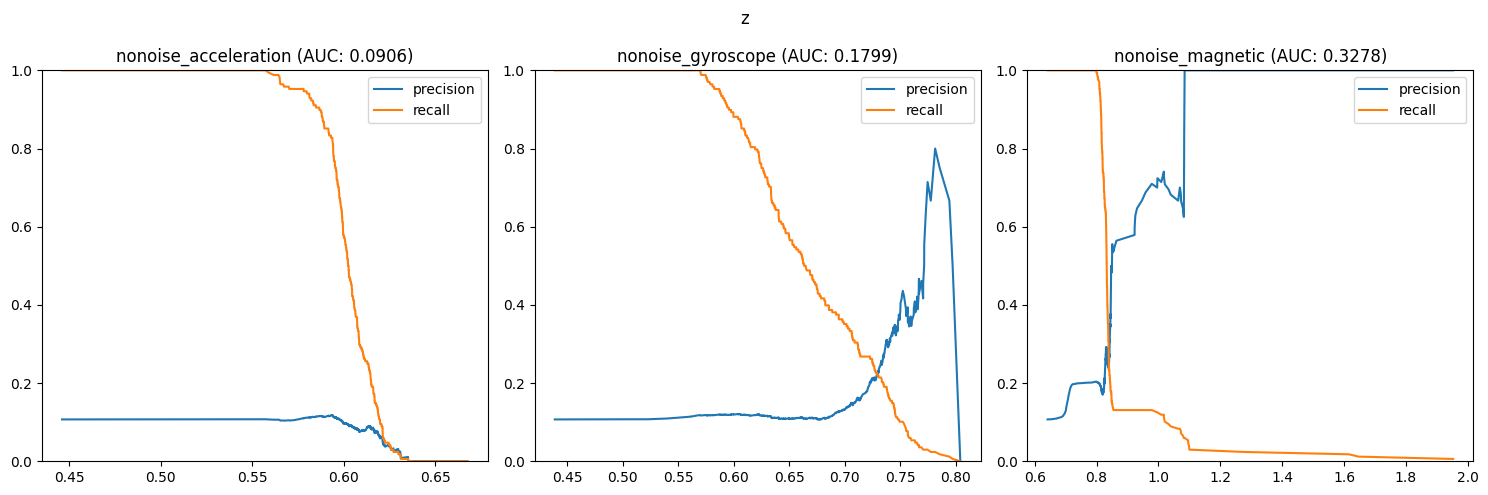

0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.613481
1       0.615903
2       0.623836
3       0.611533
4       0.613091
          ...   
1564    0.574732
1565    0.571568
1566    0.567879
1567    0.565791
1568    0.569726
Name: z, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.413793
1       0.415427
2       0.420778
3       0.412479
4       0.413530
          ...   
1564    0.387657
1565    0.385523
1566    0.383034
1567    0.381626
1568    0.384280
Name: mz, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
N

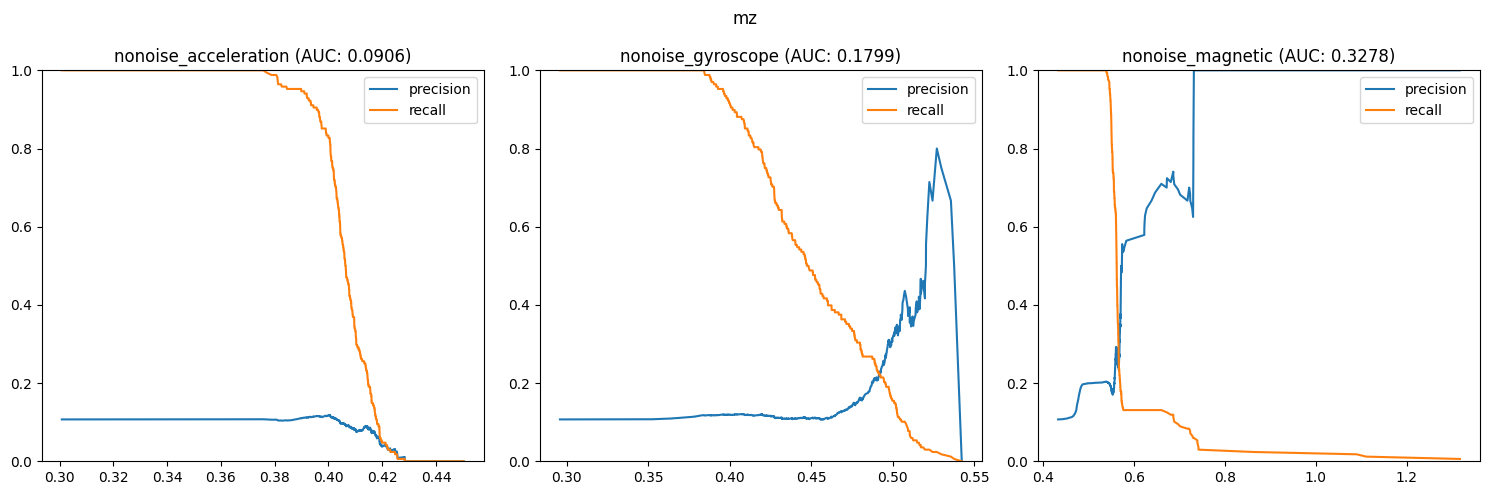

0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.613481
1       0.615903
2       0.623836
3       0.611533
4       0.613091
          ...   
1564    0.574732
1565    0.571568
1566    0.567879
1567    0.565791
1568    0.569726
Name: z, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.413793
1       0.415427
2       0.420778
3       0.412479
4       0.413530
          ...   
1564    0.387657
1565    0.385523
1566    0.383034
1567    0.381626
1568    0.384280
Name: mz, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
N

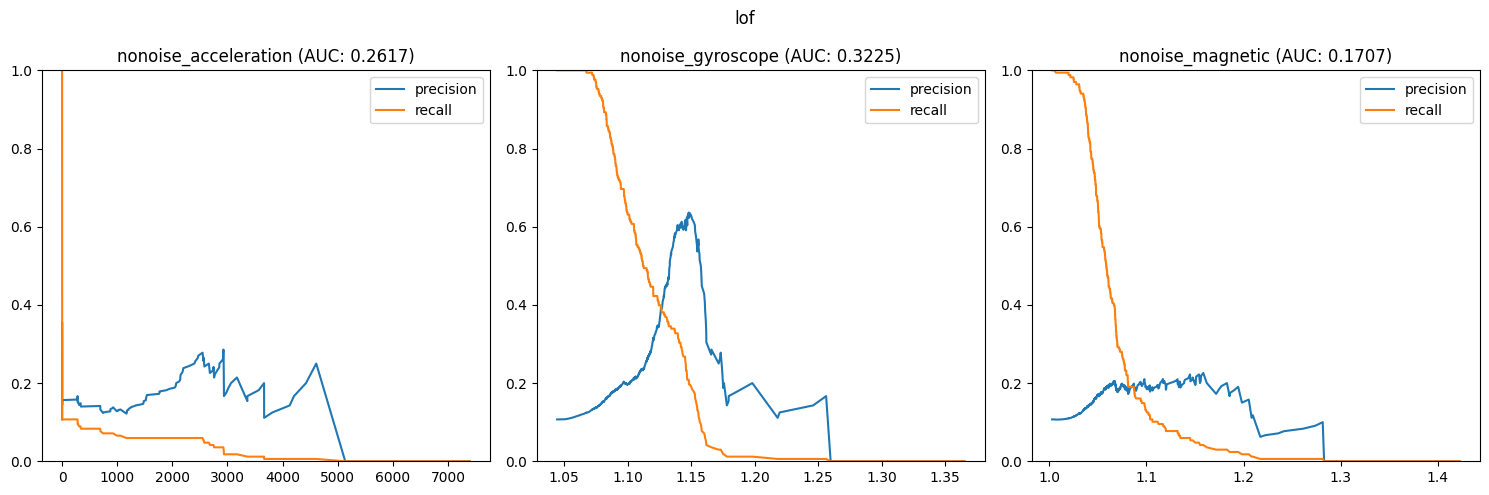

0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.613481
1       0.615903
2       0.623836
3       0.611533
4       0.613091
          ...   
1564    0.574732
1565    0.571568
1566    0.567879
1567    0.565791
1568    0.569726
Name: z, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
Name: anomalous, Length: 1569, dtype: bool
0       0.413793
1       0.415427
2       0.420778
3       0.412479
4       0.413530
          ...   
1564    0.387657
1565    0.385523
1566    0.383034
1567    0.381626
1568    0.384280
Name: mz, Length: 1569, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1564    False
1565    False
1566    False
1567    False
1568    False
N

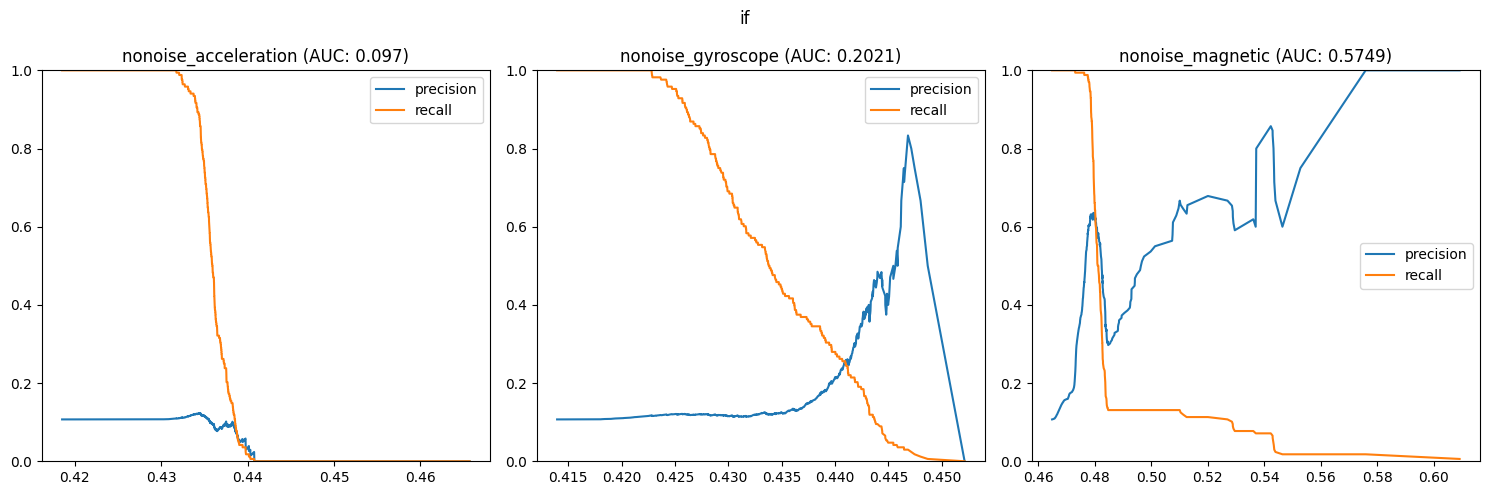

In [7]:
rp_curves = {}

for (mname, _) in models.items():
    rp_curves[mname] = {}
    for (ename, exp) in exps_sensors.items():
        exp.calculate_metrics(models, aggrfunc=agg.aggr_sum)
        rp_curves[mname][ename] = exp.results['pr'][mname]
    with warnings.catch_warnings(action="ignore"):
        plot_rpcurves(rp_curves[mname], colnums=3, title=mname, auc=True, f1=False)